<a href="https://colab.research.google.com/github/Nderwoodfrank/Heart-Disease-Prediction/blob/main/CS5079_Assessment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [3]:
file_url="https://raw.githubusercontent.com/Nderwoodfrank/Heart-Disease-Prediction/refs/heads/main/heart_disease_uci.csv"
heart=pd.read_csv(file_url)
heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
heart.shape

(920, 16)

In [ ]:
heart.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [ ]:
heart = heart.rename(columns={"dataset" : "Location", "cp" : "ChestPainType", "trestbps" : "restingbp", "fbs" : "fastingbs", "thalch" : "Max_heartrate", "exang" : "exercise_chestpain", "num" : "result"})
heart.head()

,id,age,sex,Location,ChestPainType,restingbp,chol,fastingbs,restecg,Max_heartrate,exercise_chestpain,oldpeak,slope,ca,thal,result
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  920 non-null    int64  
 1   age                 920 non-null    int64  
 2   sex                 920 non-null    object 
 3   Location            920 non-null    object 
 4   ChestPainType       920 non-null    object 
 5   restingbp           861 non-null    float64
 6   chol                890 non-null    float64
 7   fastingbs           830 non-null    object 
 8   restecg             918 non-null    object 
 9   Max_heartrate       865 non-null    float64
 10  exercise_chestpain  865 non-null    object 
 11  oldpeak             858 non-null    float64
 12  slope               611 non-null    object 
 13  ca                  309 non-null    float64
 14  thal                434 non-null    object 
 15  result              920 non-null    int64  
dtypes: float

In [ ]:
null_values = heart.isnull().sum()
null_values

id                      0
age                     0
sex                     0
Location                0
ChestPainType           0
restingbp              59
chol                   30
fastingbs              90
restecg                 2
Max_heartrate          55
exercise_chestpain     55
oldpeak                62
slope                 309
ca                    611
thal                  486
result                  0
dtype: int64

In [ ]:
columns_to_drop = ['slope', 'ca', 'thal']
heart.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
heart.head()

,id,age,sex,Location,ChestPainType,restingbp,chol,fastingbs,restecg,Max_heartrate,exercise_chestpain,oldpeak,result
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [ ]:
heart.isnull().sum()

id                     0
age                    0
sex                    0
Location               0
ChestPainType          0
restingbp             59
chol                  30
fastingbs             90
restecg                2
Max_heartrate         55
exercise_chestpain    55
oldpeak               62
result                 0
dtype: int64

In [ ]:
heart.shape

(920, 13)

In [ ]:
heart.dropna(axis=0,inplace=True)
heart.isnull().sum()

id                    0
age                   0
sex                   0
Location              0
ChestPainType         0
restingbp             0
chol                  0
fastingbs             0
restecg               0
Max_heartrate         0
exercise_chestpain    0
oldpeak               0
result                0
dtype: int64

In [ ]:
heart.shape

(740, 13)

In [ ]:
heart.duplicated().sum()

0

In [ ]:
heart.drop('id', axis=1, inplace=True)

In [ ]:
heart['Location'].value_counts()

Cleveland        304
Hungary          260
VA Long Beach    130
Switzerland       46
Name: Location, dtype: int64

In [ ]:
heart['ChestPainType'].value_counts()

asymptomatic       392
non-anginal        161
atypical angina    150
typical angina      37
Name: ChestPainType, dtype: int64

In [ ]:
heart.describe()

,age,restingbp,chol,Max_heartrate,oldpeak,result
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,53.097297,132.754054,220.136486,138.744595,0.894324,0.924324
std,9.408127,18.581250,93.614555,25.846082,1.087160,1.128882
min,28.000000,0.000000,0.000000,60.000000,-1.000000,0.000000
25%,46.000000,120.000000,197.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,231.000000,140.000000,0.500000,1.000000
75%,60.000000,140.000000,271.000000,159.250000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


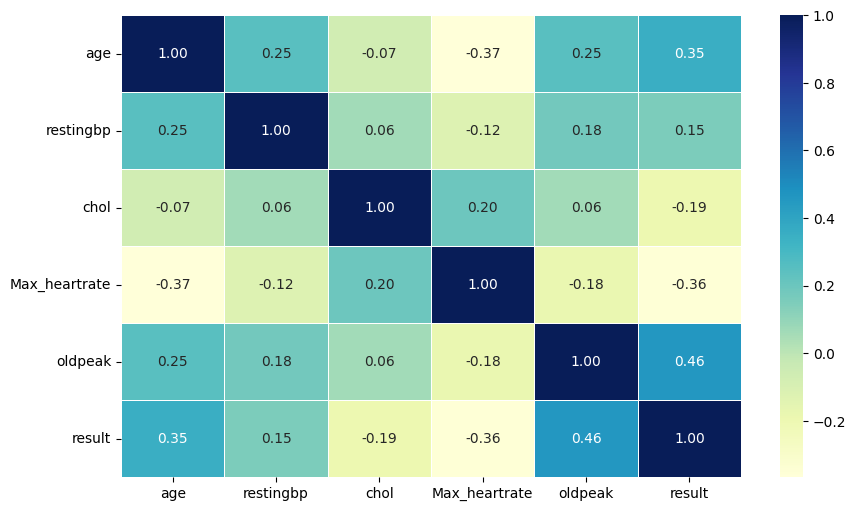

In [ ]:
heatmap = heart.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(heatmap,
                annot=True,
                linewidths=0.5,fmt=".2f",
                cmap="YlGnBu")

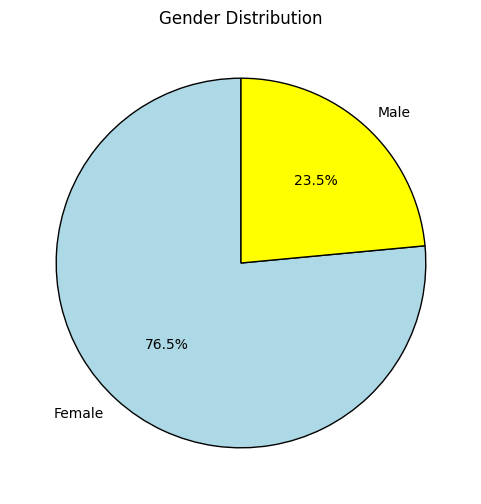

In [ ]:
gender_counts = heart['sex'].value_counts()
labels = ['Female', 'Male']
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'yellow'], wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution')
plt.show()

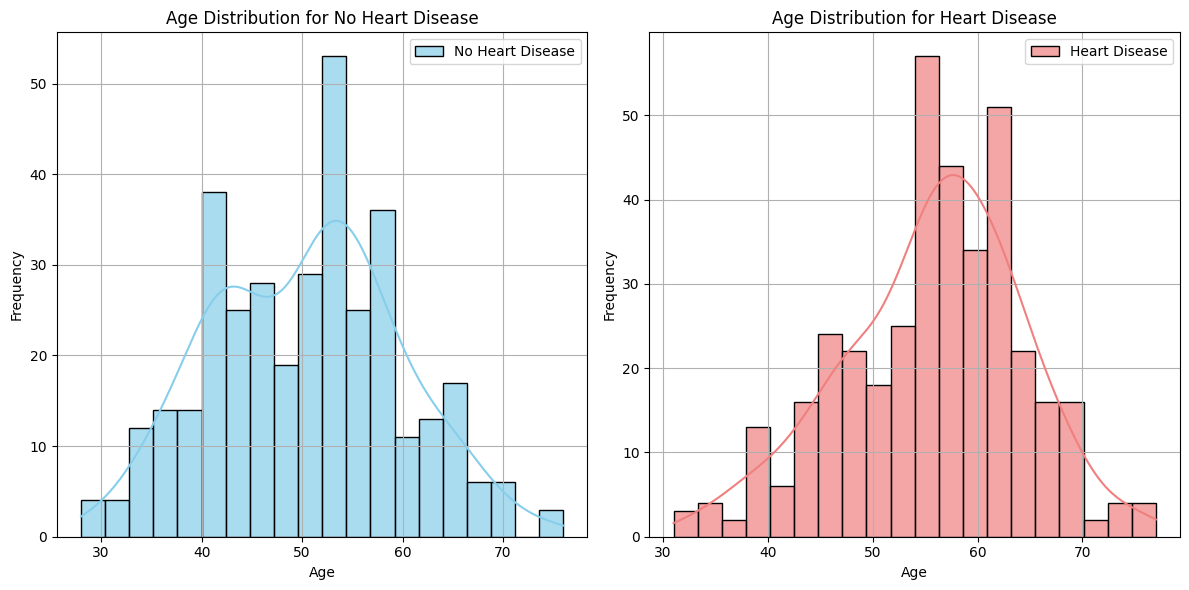

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=heart[heart['result'] == 0], x='age', bins=20, alpha=0.7, label='No Heart Disease', color='skyblue', edgecolor='black', ax=axs[0], kde = True)
sns.histplot(data=heart[heart['result'] != 0], x='age', bins=20, alpha=0.7, label='Heart Disease', color='lightcoral', edgecolor='black', ax=axs[1], kde = True)

for ax, label in zip(axs, ['No Heart Disease', 'Heart Disease']):
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Age Distribution for {label}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

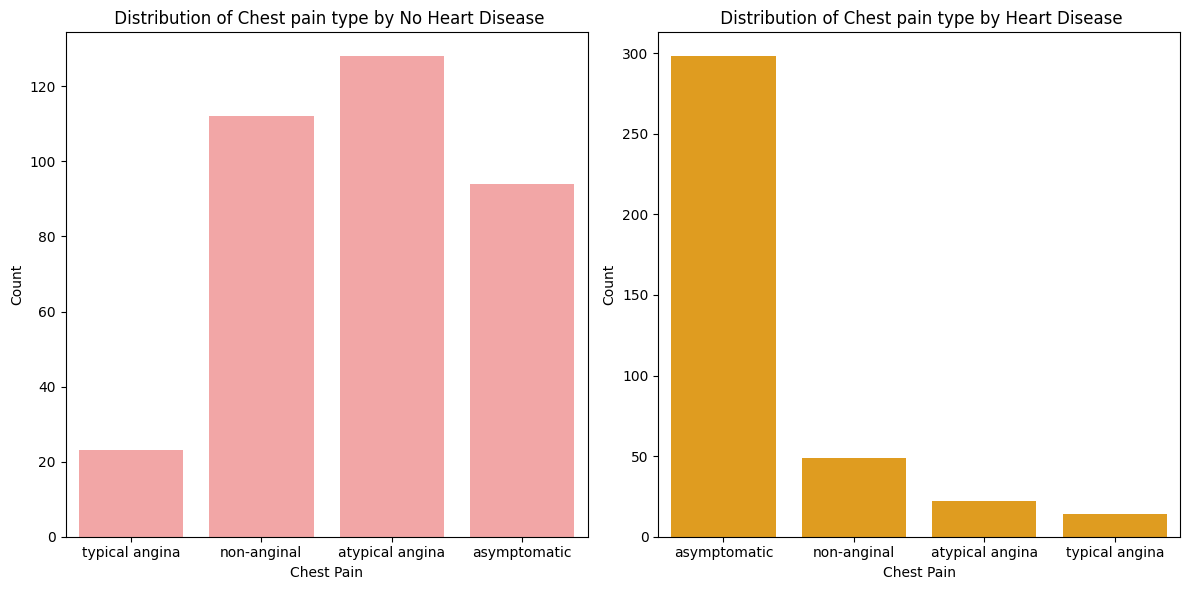

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=heart[heart['result'] == 0], x='ChestPainType', ax=axs[0], color='#FF9999')
sns.countplot(data=heart[heart['result'] != 0], x='ChestPainType', ax=axs[1], color='orange')

for ax, label in zip(axs, ['No Heart Disease', 'Heart Disease']):
    ax.set_xlabel('Chest Pain')
    ax.set_ylabel('Count')
    ax.set_title(f' Distribution of Chest pain type by {label}')
plt.tight_layout()
plt.show()

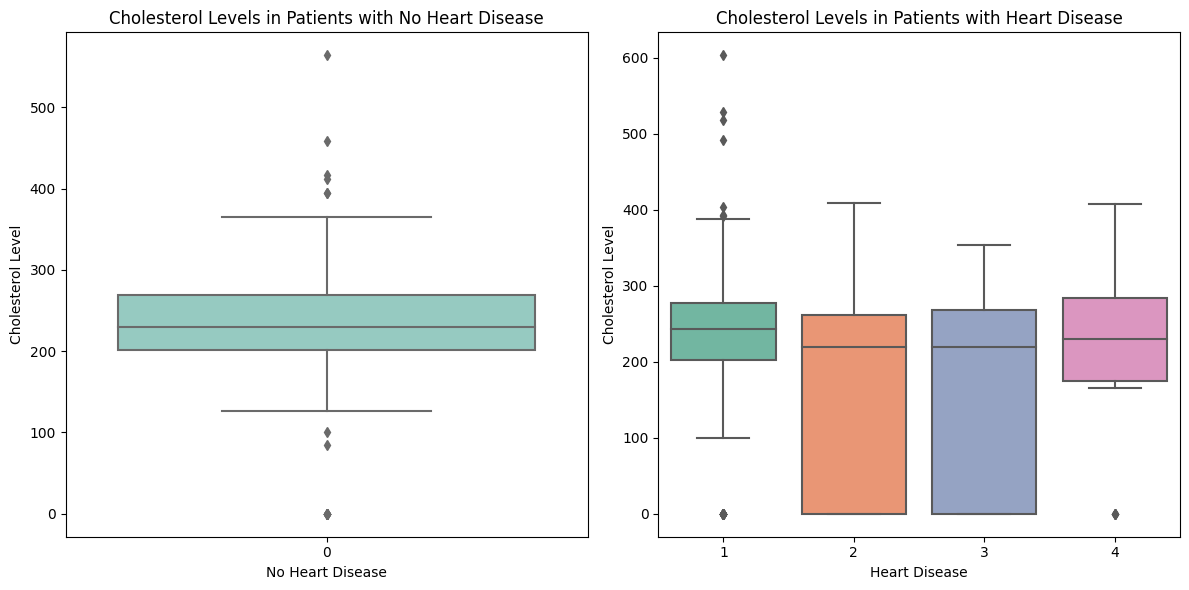

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for cholesterol levels in patients with no heart disease
sns.boxplot(data=heart[heart['result'] == 0], x='result', y='chol', ax=axs[0], palette='Set3')
axs[0].set_title('Cholesterol Levels in Patients with No Heart Disease')
axs[0].set_xlabel('No Heart Disease')
axs[0].set_ylabel('Cholesterol Level')

# Box plot for cholesterol levels in patients with heart disease
sns.boxplot(data=heart[heart['result'] != 0], x='result', y='chol', ax=axs[1], palette='Set2')
axs[1].set_title('Cholesterol Levels in Patients with Heart Disease')
axs[1].set_xlabel('Heart Disease')
axs[1].set_ylabel('Cholesterol Level')

plt.tight_layout()
plt.show()

In [ ]:
columns_having_categories = ['Location', 'ChestPainType', 'restingbp', 'fastingbs', 'restecg', 'exercise_chestpain', 'sex']
heart[columns_having_categories] = heart[columns_having_categories].astype('category')

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 919
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 740 non-null    int64   
 1   sex                 740 non-null    category
 2   Location            740 non-null    category
 3   ChestPainType       740 non-null    category
 4   restingbp           740 non-null    category
 5   chol                740 non-null    float64 
 6   fastingbs           740 non-null    category
 7   restecg             740 non-null    category
 8   Max_heartrate       740 non-null    float64 
 9   exercise_chestpain  740 non-null    category
 10  oldpeak             740 non-null    float64 
 11  result              740 non-null    int64   
dtypes: category(7), float64(3), int64(2)
memory usage: 43.1 KB


In [ ]:
label_encoder = LabelEncoder()
for col in columns_having_categories:
    heart[col] = label_encoder.fit_transform(heart[col])
heart.head()

,age,sex,Location,ChestPainType,restingbp,chol,fastingbs,restecg,Max_heartrate,exercise_chestpain,oldpeak,result
0,63,1,0,3,37,233.0,1,0,150.0,0,2.3,0
1,67,1,0,0,46,286.0,0,0,108.0,1,1.5,2
2,67,1,0,0,19,229.0,0,0,129.0,1,2.6,1
3,37,1,0,2,28,250.0,0,1,187.0,0,3.5,0
4,41,0,0,1,28,204.0,0,0,172.0,0,1.4,0


In [ ]:
heart['result'] = heart['result'].apply(lambda x: 1 if x > 0 else 0)
heart.head()

,age,sex,Location,ChestPainType,restingbp,chol,fastingbs,restecg,Max_heartrate,exercise_chestpain,oldpeak,result
0,63,1,0,3,37,233.0,1,0,150.0,0,2.3,0
1,67,1,0,0,46,286.0,0,0,108.0,1,1.5,1
2,67,1,0,0,19,229.0,0,0,129.0,1,2.6,1
3,37,1,0,2,28,250.0,0,1,187.0,0,3.5,0
4,41,0,0,1,28,204.0,0,0,172.0,0,1.4,0


In [ ]:
X = heart.drop('result', axis=1)
y = heart['result']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

In [ ]:
models = [log_reg, random_forest, knn]
model_names = ['Logistic Regression', 'Random Forest', 'KNN']

best_accuracy = 0.0
best_model = None
best_model_name = ''

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"{name} Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

Logistic Regression Accuracy: 0.8311
Random Forest Accuracy: 0.8176
KNN Accuracy: 0.7838

Best Model: Logistic Regression with Accuracy: 0.8311


In [ ]:
if best_model_name == 'Logistic Regression':
        param_grid = {'C': np.logspace(-1, 1, 10),
                      "solver": ["liblinear"]}
        model_to_tune = log_reg
        np.random.seed(42)

In [ ]:
if best_model_name == 'KNN':
        param_grid = {'n_neighbors': range(1,21)}
        model_to_tune = knn
        np.random.seed(42)

In [ ]:
if best_model_name == 'Random Forest':
      param_grid = {
        'n_estimators': np.arrange(100, 200, 300),
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': np.arrange(2, 5, 10),
        'min_samples_leaf': np.arrange(1, 2, 4),
      }
      model_to_tune = random_forest
      np.random.seed(42)


In [ ]:
model_random = RandomizedSearchCV(estimator=model_to_tune, param_distributions=param_grid, n_iter=50, cv=5, verbose=True)
model_random.fit(X_train, y_train)

The total space of parameters 10 is smaller than n_iter=50. Running 10 iterations. For exhaustive searches, use GridSearchCV.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(C=1.291549665014884,
                                                random_state=42,
                                                solver='liblinear'),
                   n_iter=50,
                   param_distributions={'C': array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
best_params_model =model_random.best_params_
print("Best Parameters:", best_params_model)

Best Parameters: {'solver': 'liblinear', 'C': 1.291549665014884}


In [ ]:
best_model_tuned = model_to_tune.set_params(**best_params_model)
best_model_tuned.fit(X_train, y_train)
y_pred = best_model_tuned.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest {best_model_name} Model Accuracy after Hyperparameter Tuning: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Logistic Regression Model Accuracy after Hyperparameter Tuning: 0.8311
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        75
           1       0.81      0.86      0.83        73

    accuracy                           0.83       148
   macro avg       0.83      0.83      0.83       148
weighted avg       0.83      0.83      0.83       148



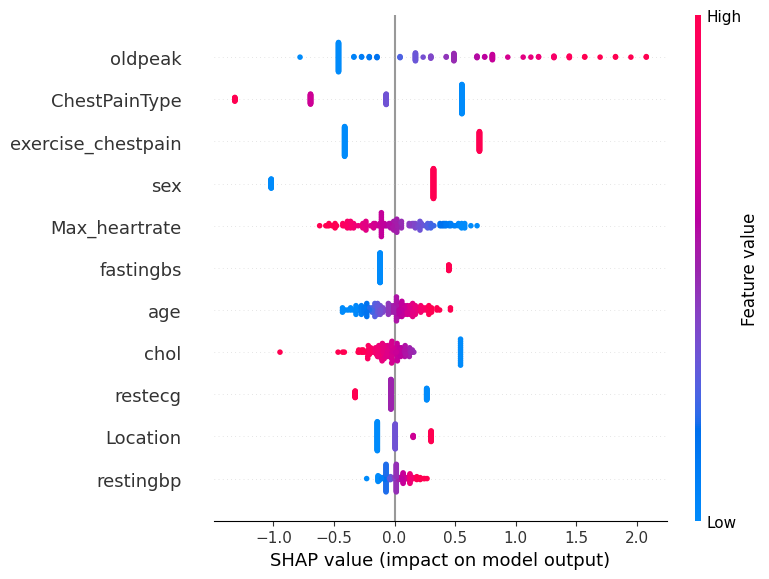

In [ ]:
import shap
explainer = shap.Explainer(model_to_tune, X_train)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

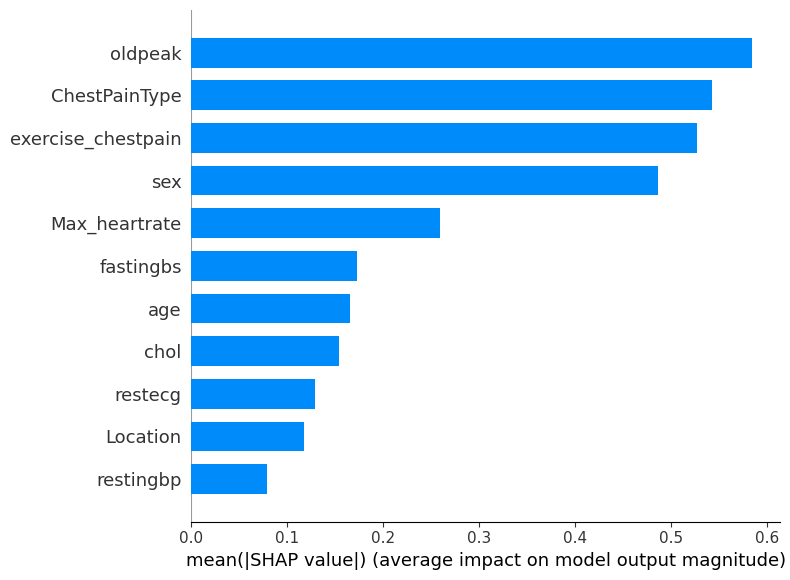

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=X.columns )

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test, feature_names=X.columns)

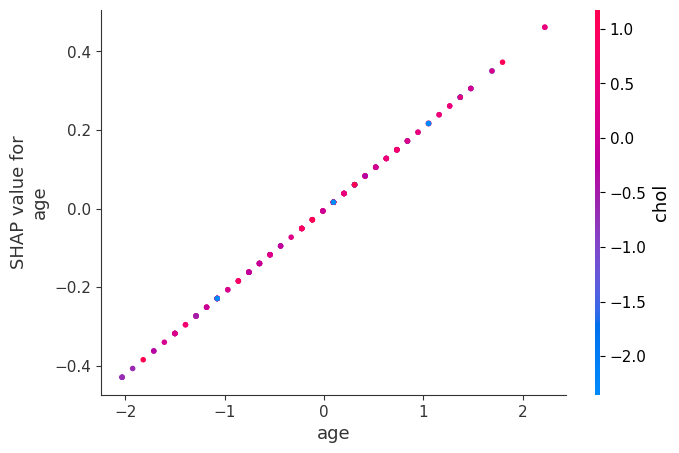

In [ ]:
shap.dependence_plot("age", shap_values, X_test, feature_names=X.columns)

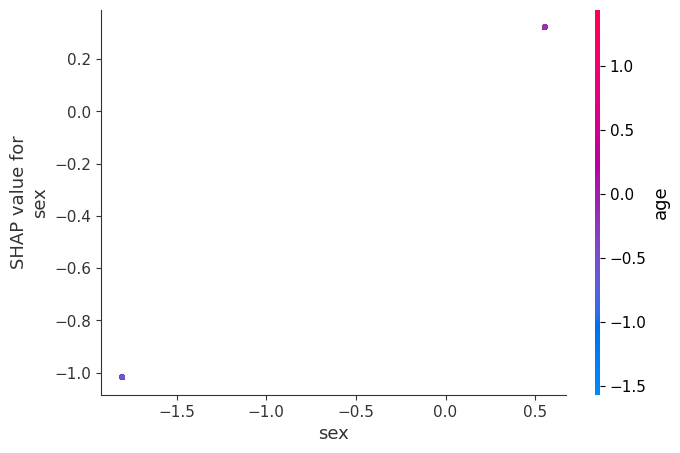

In [ ]:
shap.dependence_plot("sex", shap_values, X_test, feature_names=X.columns)

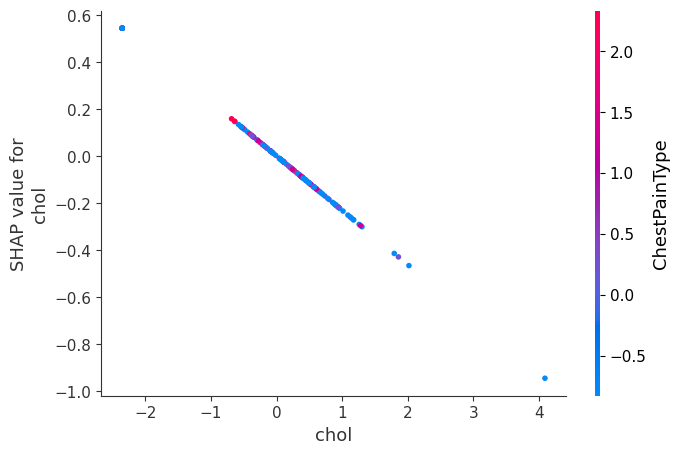

In [ ]:
shap.dependence_plot("chol", shap_values, X_test, feature_names=X.columns)

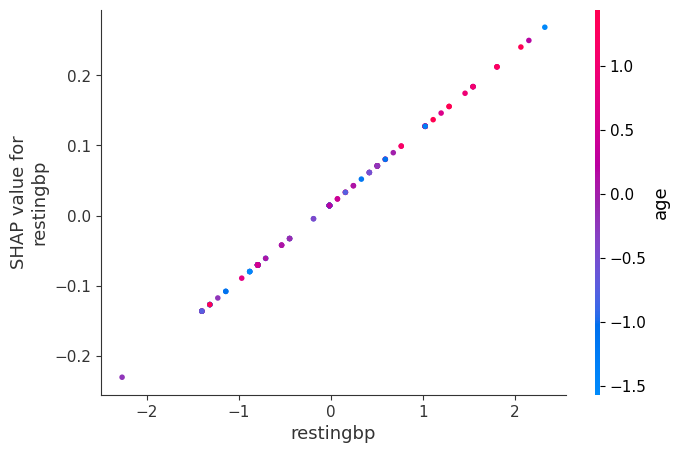

In [ ]:
shap.dependence_plot("restingbp", shap_values, X_test, feature_names=X.columns)

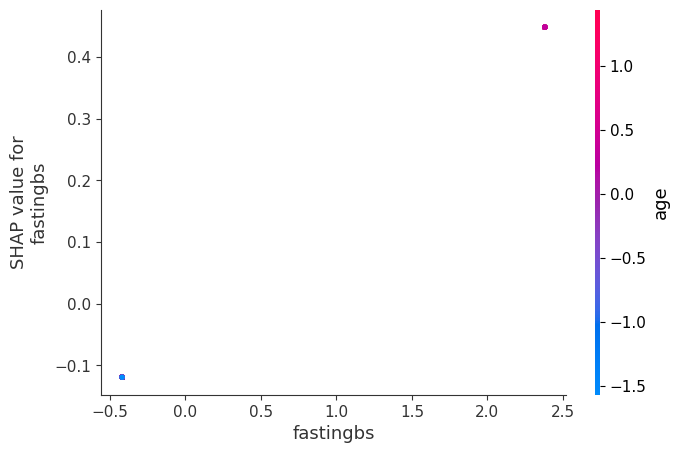

In [ ]:
shap.dependence_plot("fastingbs", shap_values, X_test, feature_names=X.columns)

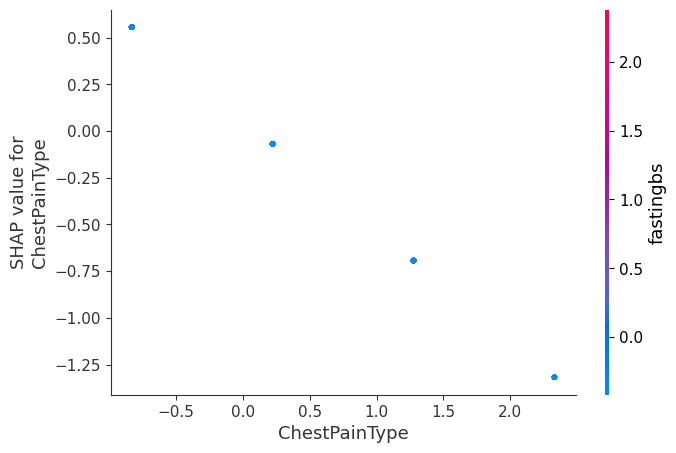

In [ ]:
shap.dependence_plot("ChestPainType", shap_values, X_test, feature_names=X.columns)